## Objective of the project:

### Predicting bike stations with too many idle bikes and too low available bikes (and find a way to fill the gap if possible)

### Useful Information
- The number of rides is decreasing in 2017
- Difference in usage in different membership between subscriberand pay-as-you-go customer, but the information is not available until 2017 Q1. (Maybe it's because they introduced the subscription membership in 2017?)
- Healthy Ride wants to know where they have to expand their bike stations
- Data Dictionary
https://data.wprdc.org/dataset/healthyride-trip-data/resource/fe985614-775c-42e3-9647-59099806329d

In [1]:
import pandas as pd

In [2]:
filenames = ['https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/2c29e217-935d-4d66-909f-9f1b060ed36c/download/healthy-ride-rentals-2017-q2.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/102b0be5-aa3f-48b5-9306-e628ae1ae44d/download/healthy-ride-rentals-2017-q1.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/c2608a60-9282-4e3d-b45d-a0306b75a3c9/download/healthyride-rentals-2016-q4.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/2617daa2-4f89-4e2c-9be9-98254f1d8352/download/healthyride-rentals-2016-q3.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/ebd54bd3-6e46-4941-af21-65bdc3fb4ced/download/healthyride-rentals-2016-q2.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/92a1a819-2750-4625-88e3-48cf3dd87794/download/healthyride-rentals-2016-q1.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/7fe58023-39be-4fa5-a7b7-27d7b0e077a7/download/healthyride-rentals-2015-q4.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/7f68c23c-7ba3-4e5c-862d-e0cdc7ec2b67/download/healthyride-rentals-2015-q3.csv',
             'https://data.wprdc.org/dataset/bfbaa051-677c-445f-95c5-f9ca129accd4/resource/15ce5154-4807-4d29-baa1-b63bbb033b79/download/healthyride-rentals-2015-q2.csv']

In [3]:
df = pd.DataFrame()
for f in filenames:
    csv = pd.read_csv(f, encoding='latin-1') # UTF8 can't handle some station names
    df = df.append(csv)

df = df.reset_index(drop=True)

In [4]:
len(df['From station id'].unique())

79

In [5]:
df['Starttime'] = pd.to_datetime(df['Starttime'])
df['Stoptime'] = pd.to_datetime(df['Stoptime'])

In [6]:
df.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,27193394,2017-04-01 00:59:00,2017-04-01 01:43:00,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer
1,27193815,2017-04-01 01:43:00,2017-04-01 01:48:00,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber
2,27194749,2017-04-01 02:35:00,2017-04-01 03:01:00,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer
3,27201194,2017-04-01 05:05:00,2017-04-01 07:46:00,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer
4,27203670,2017-04-01 05:35:00,2017-04-01 05:54:00,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber


In [52]:
df['Starttime'][0].year

2017

In [7]:
# Query trip records in 2016
df[(df['Starttime'] >= '2016-1-1 00:00:00') & (df['Starttime'] < '2017-1-1 00:00:00')]

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
31647,24420718,2016-10-01 01:51:00,2016-10-01 02:01:00,70233,598,1018,37th St & Butler St,1017,21st St & Penn Ave,NaN
31648,24420723,2016-10-01 01:51:00,2016-10-01 02:00:00,70103,497,1018,37th St & Butler St,1017,21st St & Penn Ave,NaN
31649,24420960,2016-10-01 02:18:00,2016-10-01 03:06:00,70197,2887,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,1034,Ellsworth Ave & N Neville St,NaN
31650,24421083,2016-10-01 02:28:00,2016-10-01 02:47:00,70372,1154,1000,Liberty Ave & Stanwix St,1049,S 12th St & E Carson St,NaN
31651,24421586,2016-10-01 03:05:00,2016-10-01 03:17:00,70126,675,1041,Fifth Ave & S Bouquet St,1033,Ivy St & Walnut St,NaN
31652,24423420,2016-10-01 04:39:00,2016-10-01 04:49:00,70059,568,1002,Third Ave & Wood St,1013,Isabella St & Federal St (PNC Park),NaN
31653,24425934,2016-10-01 06:05:00,2016-10-01 06:12:00,70365,405,1039,Atwood St & Bates St,1040,Bigelow Blvd & Fifth Ave,NaN
31654,24428018,2016-10-01 07:02:00,2016-10-01 08:40:00,70317,5840,1048,S 18th St & Sidney St,1048,S 18th St & Sidney St,NaN
31655,24428718,2016-10-01 07:20:00,2016-10-01 07:28:00,70262,463,1017,21st St & Penn Ave,1000,Liberty Ave & Stanwix St,NaN
31656,24429542,2016-10-01 07:39:00,2016-10-01 07:45:00,70147,354,1024,S Negley Ave & Baum Blvd,1033,Ivy St & Walnut St,NaN


In [11]:
# number of records
len(df.index)

170531

In [15]:
df['Tripduration'] = df['Tripduration']/3600 # unit changes from sec to hours

In [16]:
freq = df['Tripduration'].value_counts()
freq[freq<=10].count()
# many outliers exist

11925

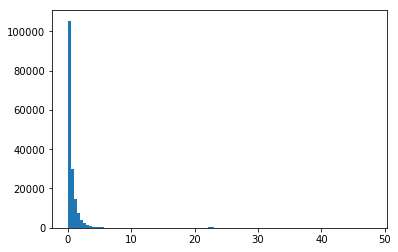

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df['Tripduration'], bins=100)
plt.show()

## Realtime bike station data

In [48]:
import requests
r = requests.get('https://api.nextbike.net/maps/nextbike-live.xml?&city=254')
from xml.etree import ElementTree
root = ElementTree.fromstring(r.content)

In [ ]:
i=0
for parent in root.getiterator():
    for child in parent:
        # do something